In [1]:
from matplotlib.font_manager import json_load
import pandas as pd
import json
import os
import psycopg2 as ps
from datetime import date, datetime, timedelta
# %%
pd.set_option('display.max_columns', None)

In [2]:
os.getcwd()

'C:\\Users\\lacia\\OneDrive\\Documents\\10. Taller de trabajo final integrador\\0. Labs'

In [3]:
#ps.connect(host=hostname,dbname=database,user=username,password=pwd,port=portid)
def connect_to_db(host_name,db_name,port,username,password):
    try:
        conn = ps.connect(
            host = hostname,
            dbname = database,
            user = username,
            password = pwd,
            port = portid
        )
    except ps.OperationalError as e:
        raise e
    else:
        print("Connected!")
    return conn


In [4]:
# %%
#Parametros para conectarnos a la base de datos
hostname = "localhost"
database = 'precios_clarosdb'
username = 'postgres'
pwd = 'postgres'
portid = 5432
#conn = None
#cur = None



In [5]:
conn = connect_to_db(hostname,database,portid,username,pwd)

Connected!


In [6]:
def query(curr):
    consulta = ("""SELECT * FROM db_python;""")
    curr.execute(consulta)

In [7]:
curr = conn.cursor()

In [8]:
query(curr)

In [9]:
query_results = curr.fetchall()

In [10]:
columnas = ['key', 'bandera_id', 'lat', 'lng',
            'sucursalnombre', 'id_', 'sucursaltipo',
            'provincia', 'promo1_descripcion','promo1_precio',
            'preciolista','promo2_descripcion','promo2_precio',
            'actualizadohoy','direccion','banderadescripcion',
            'localidad','comerciorazonsocial','comercioid','marca','nombre',
           'presentacion','fecha']

In [11]:
df = pd.DataFrame(query_results, columns=columnas)

In [12]:
df.head()

,key,bandera_id,lat,lng,sucursalnombre,id_,sucursaltipo,provincia,promo1_descripcion,promo1_precio,preciolista,promo2_descripcion,promo2_precio,actualizadohoy,direccion,banderadescripcion,localidad,comerciorazonsocial,comercioid,marca,nombre,presentacion,fecha
0,sucursales,1,-34.6036515,-58.405234,384 - BALVANERA,7790070012050,Autoservicio,AR-C,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Av Pueyrredon 576 (Balvanera),Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24
1,sucursales,1,-34.6764626,-58.4933966,386 - VILLA LUGANO,7790070012050,Autoservicio,AR-C,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Montiel 3829 (Villa Lugano),Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24
2,sucursales,1,-34.6530744,-58.4814134,387 - PARQUE AVELLANEDA,7790070012050,Autoservicio,AR-C,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Av Olivera 1268 (Villa Lugano),Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24
3,sucursales,1,-34.6262843,-58.4569877,389 - FLORES,7790070012050,Autoservicio,AR-C,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Av Boyaca 37 (Flores),Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24
4,sucursales,1,-35.0530892,-58.7606411,39 - CAÑUELAS,7790070012050,Autoservicio,AR-B,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Cl Rivadavia 800,Supermercados DIA,BUENOS AIRES,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24


In [13]:
df.describe()

,promo1_precio,preciolista,promo2_precio
count,48766.000000,883967.000000,169302.000000
mean,301.956851,300.008436,249.343296
std,97.320125,135.662823,123.814429
min,94.560000,0.000000,67.900000
25%,192.800000,167.660000,135.310000
50%,306.750000,320.100000,228.990000
75%,360.000000,383.000000,346.040000
max,602.650000,709.000000,556.400000


In [14]:
df.dtypes

key                     object
bandera_id              object
lat                     object
lng                     object
sucursalnombre          object
id_                     object
sucursaltipo            object
provincia               object
promo1_descripcion      object
promo1_precio          float64
preciolista            float64
promo2_descripcion      object
promo2_precio          float64
actualizadohoy          object
direccion               object
banderadescripcion      object
localidad               object
comerciorazonsocial     object
comercioid              object
marca                   object
nombre                  object
presentacion            object
fecha                   object
dtype: object

In [15]:
df['promo1_precio'].isnull()

0          False
1          False
2          False
3          False
4          False
           ...  
1153795     True
1153796     True
1153797     True
1153798     True
1153799     True
Name: promo1_precio, Length: 1153800, dtype: bool

In [16]:
df['lat'] = df['lat'].astype('float64')
df['lng'] = df['lng'].astype('float64')


In [17]:
df.describe()

,lat,lng,promo1_precio,preciolista,promo2_precio
count,875937.000000,875937.000000,48766.000000,883967.000000,169302.000000
mean,-35.328574,-60.459678,301.956851,300.008436,249.343296
std,3.861188,3.579406,97.320125,135.662823,123.814429
min,-54.830640,-72.336170,94.560000,0.000000,67.900000
25%,-34.858230,-60.947400,192.800000,167.660000,135.310000
50%,-34.618229,-58.506874,306.750000,320.100000,228.990000
75%,-34.562834,-58.423667,360.000000,383.000000,346.040000
max,-22.513508,-55.876680,602.650000,709.000000,556.400000


In [18]:
print(df['fecha'].min())
print(df['fecha'].max())

2022-06-11
2022-08-25


# Comenzamos la proyección

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [20]:
df.head()

,key,bandera_id,lat,lng,sucursalnombre,id_,sucursaltipo,provincia,promo1_descripcion,promo1_precio,preciolista,promo2_descripcion,promo2_precio,actualizadohoy,direccion,banderadescripcion,localidad,comerciorazonsocial,comercioid,marca,nombre,presentacion,fecha
0,sucursales,1,-34.603651,-58.405234,384 - BALVANERA,7790070012050,Autoservicio,AR-C,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Av Pueyrredon 576 (Balvanera),Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24
1,sucursales,1,-34.676463,-58.493397,386 - VILLA LUGANO,7790070012050,Autoservicio,AR-C,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Montiel 3829 (Villa Lugano),Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24
2,sucursales,1,-34.653074,-58.481413,387 - PARQUE AVELLANEDA,7790070012050,Autoservicio,AR-C,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Av Olivera 1268 (Villa Lugano),Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24
3,sucursales,1,-34.626284,-58.456988,389 - FLORES,7790070012050,Autoservicio,AR-C,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Av Boyaca 37 (Flores),Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24
4,sucursales,1,-35.053089,-58.760641,39 - CAÑUELAS,7790070012050,Autoservicio,AR-B,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Cl Rivadavia 800,Supermercados DIA,BUENOS AIRES,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24


# Datos dolar blue
### Fuente https://www.ambito.com/contenidos/dolar-informal-historico.html 11/09/2022 14:25hs

In [21]:
import datetime

In [22]:
df_dolar = pd.read_excel('./data/Dolar_Blue.xlsx')
df_dolar.head()

,fecha,compra,venta,promedio
0,2022-09-09,270,274,272.0
1,2022-09-08,276,280,278.0
2,2022-09-07,280,284,282.0
3,2022-09-06,272,276,274.0
4,2022-09-05,266,270,268.0


(array([19158., 19174., 19188., 19205., 19219., 19236.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

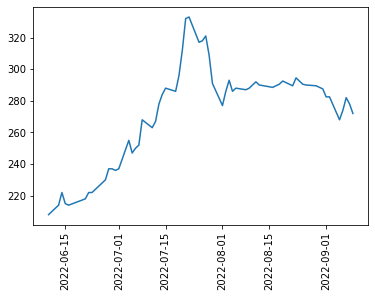

In [23]:
x = df_dolar['fecha']
y = df_dolar['promedio']
plt.plot(x,y)
plt.xticks(rotation=90)

In [24]:
df_dolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   fecha     63 non-null     datetime64[ns]
 1   compra    63 non-null     int64         
 2   venta     63 non-null     int64         
 3   promedio  63 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 2.1 KB


In [25]:
df_dolar['fecha']

0    2022-09-09
1    2022-09-08
2    2022-09-07
3    2022-09-06
4    2022-09-05
        ...    
58   2022-06-16
59   2022-06-15
60   2022-06-14
61   2022-06-13
62   2022-06-10
Name: fecha, Length: 63, dtype: datetime64[ns]

In [26]:
#Completamos valores de sábado y domingo con el valor del día anterior
df_dolar = (df_dolar.set_index('fecha')
      .reindex(pd.date_range('2022-06-10', '2022-09-09', freq='D'))
      .rename_axis(['fecha'])
      .fillna(method='ffill')
      .reset_index())

In [27]:
df_dolar['fecha']

0    2022-06-10
1    2022-06-11
2    2022-06-12
3    2022-06-13
4    2022-06-14
        ...    
87   2022-09-05
88   2022-09-06
89   2022-09-07
90   2022-09-08
91   2022-09-09
Name: fecha, Length: 92, dtype: datetime64[ns]

In [28]:
df_dolar.head()

,fecha,compra,venta,promedio
0,2022-06-10,206.0,210.0,208.0
1,2022-06-11,206.0,210.0,208.0
2,2022-06-12,206.0,210.0,208.0
3,2022-06-13,212.0,216.0,214.0
4,2022-06-14,220.0,224.0,222.0


(array([19158., 19174., 19188., 19205., 19219., 19236.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

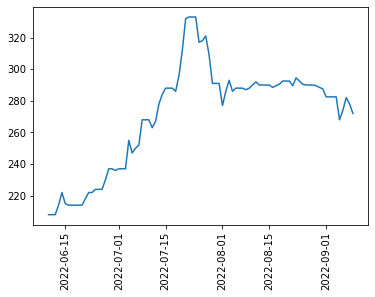

In [29]:
x = df_dolar['fecha']
y = df_dolar['promedio']
plt.plot(x,y)
plt.xticks(rotation=90)

### Traemos la marca que queremos correlacionar

In [30]:
#marcas disponibles
df['marca'].unique()

array(['COCINERO', 'LIRA', 'TARAGUI', 'CAÑUELAS', 'MAÑANITA', 'FAVORITA',
       'MORIXE', 'CRUZ DE MALTA', 'PLAYADITO', 'LA MERCED', 'CASERITA'],
      dtype=object)

In [31]:
#Crea variable con fecha limite

fecha_var = datetime.date(2022,8,23)



In [32]:
df_morixe = df[df['marca']=='MORIXE']
df_morixe = df_morixe[df_morixe['fecha']<fecha_var]

df_morixe.head()

,key,bandera_id,lat,lng,sucursalnombre,id_,sucursaltipo,provincia,promo1_descripcion,promo1_precio,preciolista,promo2_descripcion,promo2_precio,actualizadohoy,direccion,banderadescripcion,localidad,comerciorazonsocial,comercioid,marca,nombre,presentacion,fecha
87,sucursales,3,NaN,NaN,NaN,7790199000020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,MORIXE,Harina de Trigo 0000 Morixe 1 Kg,1.0 kg,2022-08-22
88,sucursales,3,NaN,NaN,NaN,7790199000020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,MORIXE,Harina de Trigo 0000 Morixe 1 Kg,1.0 kg,2022-08-22
89,sucursales,3,NaN,NaN,NaN,7790199000020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,MORIXE,Harina de Trigo 0000 Morixe 1 Kg,1.0 kg,2022-08-22
90,sucursales,3,NaN,NaN,NaN,7790199000020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,MORIXE,Harina de Trigo 0000 Morixe 1 Kg,1.0 kg,2022-08-22
91,sucursales,5,NaN,NaN,NaN,7790199000020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,MORIXE,Harina de Trigo 0000 Morixe 1 Kg,1.0 kg,2022-08-22


In [33]:
df_morixe_mean = df_morixe.groupby('fecha').mean()
df_morixe_mean = df_morixe_mean.reset_index()
df_morixe_mean.head()

,fecha,lat,lng,promo1_precio,preciolista,promo2_precio
0,2022-06-11,-35.396485,-60.475928,105.030970,122.297282,121.749819
1,2022-06-12,-35.460757,-60.275101,104.439024,122.772971,121.726476
2,2022-06-13,-35.401848,-60.475388,105.030970,123.771245,106.151254
3,2022-06-14,-35.589129,-60.341452,103.237037,124.062691,106.151254
4,2022-06-16,-35.590293,-60.352460,109.000000,128.237795,121.749819


(array([19158., 19174., 19188., 19205., 19219.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

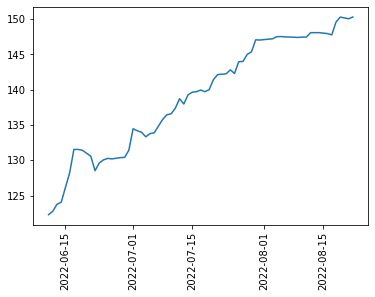

In [34]:
x = df_morixe_mean['fecha']
y = df_morixe_mean['preciolista']
plt.plot(x,y)
plt.xticks(rotation=90)

In [35]:
#vemos que hay vacíos
df_morixe_mean['fecha']

0     2022-06-11
1     2022-06-12
2     2022-06-13
3     2022-06-14
4     2022-06-16
         ...    
56    2022-08-17
57    2022-08-18
58    2022-08-19
59    2022-08-21
60    2022-08-22
Name: fecha, Length: 61, dtype: object

In [36]:
print(df_morixe_mean['fecha'].min())
print(df_morixe_mean['fecha'].max())

2022-06-11
2022-08-22


In [37]:
df_morixe_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fecha          61 non-null     object 
 1   lat            61 non-null     float64
 2   lng            61 non-null     float64
 3   promo1_precio  41 non-null     float64
 4   preciolista    61 non-null     float64
 5   promo2_precio  61 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.0+ KB


In [38]:
df_morixe_mean = (df_morixe_mean.set_index('fecha')
      .reindex(pd.date_range('2022-06-11', '2022-08-25', freq='D'))
      .rename_axis(['fecha'])
      .fillna(method='ffill')
      .reset_index())

(array([19158., 19174., 19188., 19205., 19219.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

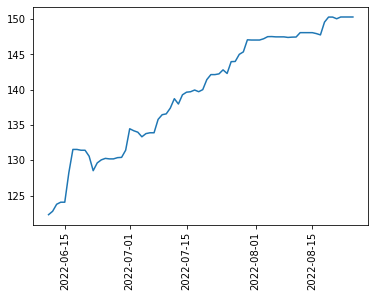

In [39]:
x = df_morixe_mean['fecha']
y = df_morixe_mean['preciolista']
plt.plot(x,y)
plt.xticks(rotation=90)

In [40]:
df_j = pd.merge(df_morixe_mean, df_dolar, on='fecha')

In [41]:
df_j

,fecha,lat,lng,promo1_precio,preciolista,promo2_precio,compra,venta,promedio
0,2022-06-11,-35.396485,-60.475928,105.030970,122.297282,121.749819,206.0,210.0,208.0
1,2022-06-12,-35.460757,-60.275101,104.439024,122.772971,121.726476,206.0,210.0,208.0
2,2022-06-13,-35.401848,-60.475388,105.030970,123.771245,106.151254,212.0,216.0,214.0
3,2022-06-14,-35.589129,-60.341452,103.237037,124.062691,106.151254,220.0,224.0,222.0
4,2022-06-15,-35.589129,-60.341452,103.237037,124.062691,106.151254,213.0,217.0,215.0
...,...,...,...,...,...,...,...,...,...
71,2022-08-21,-35.302271,-60.309291,140.490000,150.051680,123.302185,290.0,295.0,292.5
72,2022-08-22,-35.414842,-60.364075,144.990000,150.302247,122.442542,287.0,292.0,289.5
73,2022-08-23,-35.414842,-60.364075,144.990000,150.302247,122.442542,292.0,297.0,294.5
74,2022-08-24,-35.414842,-60.364075,144.990000,150.302247,122.442542,290.0,295.0,292.5


(array([19158., 19174., 19188., 19205., 19219.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

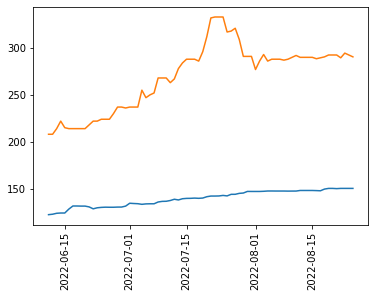

In [42]:
x = df_j['fecha']
y = df_j['preciolista']
z = df_j['promedio']
plt.plot(x,y)
plt.plot(x,z)
plt.xticks(rotation=90)

In [43]:
df_j.corr()

,lat,lng,promo1_precio,preciolista,promo2_precio,compra,venta,promedio
lat,1.000000,0.798443,0.039385,0.090936,0.114345,0.178917,0.176214,0.177600
lng,0.798443,1.000000,-0.063828,0.022146,0.215170,0.153210,0.143248,0.148148
promo1_precio,0.039385,-0.063828,1.000000,0.815230,0.410394,0.507369,0.493862,0.500627
preciolista,0.090936,0.022146,0.815230,1.000000,0.347498,0.841750,0.835139,0.838691
promo2_precio,0.114345,0.215170,0.410394,0.347498,1.000000,0.209052,0.196001,0.202423
compra,0.178917,0.153210,0.507369,0.841750,0.209052,1.000000,0.998374,0.999570
venta,0.176214,0.143248,0.493862,0.835139,0.196001,0.998374,1.000000,0.999616
promedio,0.177600,0.148148,0.500627,0.838691,0.202423,0.999570,0.999616,1.000000


In [44]:
pd.set_option('display.max_rows', 500)

# Prophet

In [45]:
# check prophet version
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [46]:
df_j.head()

,fecha,lat,lng,promo1_precio,preciolista,promo2_precio,compra,venta,promedio
0,2022-06-11,-35.396485,-60.475928,105.030970,122.297282,121.749819,206.0,210.0,208.0
1,2022-06-12,-35.460757,-60.275101,104.439024,122.772971,121.726476,206.0,210.0,208.0
2,2022-06-13,-35.401848,-60.475388,105.030970,123.771245,106.151254,212.0,216.0,214.0
3,2022-06-14,-35.589129,-60.341452,103.237037,124.062691,106.151254,220.0,224.0,222.0
4,2022-06-15,-35.589129,-60.341452,103.237037,124.062691,106.151254,213.0,217.0,215.0


In [47]:
df= df_j[['fecha','preciolista']]
#Renombro columnas para poder afectarlo a prophet
df = df.rename(columns={'fecha':'ds','preciolista':'y'})
df.head()

,ds,y
0,2022-06-11,122.297282
1,2022-06-12,122.772971
2,2022-06-13,123.771245
3,2022-06-14,124.062691
4,2022-06-15,124.062691


In [48]:
df.describe()

,y
count,76.000000
mean,139.575143
std,8.253072
min,122.297282
25%,131.538936
50%,139.983054
75%,147.468524
max,150.302247


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 0 to 75
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      76 non-null     datetime64[ns]
 1   y       76 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


In [50]:
from fbprophet import Prophet
model = Prophet()

In [ ]:
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\lacia\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


KeyError: 'metric_file'

In [ ]:
import pandas as pd
# print version number
print('Pandas %s' % pd.__version__)

In [ ]:
import pystan

In [ ]:
print('Pandas %s' % pystan.__version__)